# Classification Notebook

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## Working with All features

### Loading & Preprocessing Dataset

In [2]:
full_dataset = pd.read_csv('../data/all_features_data.csv')
full_dataset.sample(10)

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
766,12,90,60,7.5,102.0,66,Mid
449,17,85,60,7.9,102.0,86,Low
79,16,90,65,6.9,98.0,76,Mid
660,13,90,65,7.9,101.0,80,Mid
818,15,76,49,6.8,98.0,77,Low
884,23,120,90,7.5,98.0,60,Low
865,16,70,50,7.5,100.0,70,Low
87,19,120,75,6.9,98.0,66,Mid
41,25,90,70,6.1,98.0,80,Low
479,42,120,80,7.5,98.0,70,Low


In [3]:
X = full_dataset.drop(columns=['RiskLevel'])
y = full_dataset['RiskLevel']

In [4]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

### Models

In [7]:
models = {
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, verbose=0, random_state=42)
}

In [8]:
results = {}
for name, model in models.items():
    print(f"============================== {name} ==============================\n")
    model.fit(X_train, le.transform(y_train))
    y_pred_encoded = model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


============================== Softmax Regression ==============================

Test Accuracy: 0.5775
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.67      0.68        39
         Low       0.63      0.70      0.66        84
         Mid       0.41      0.36      0.38        64

    accuracy                           0.58       187
   macro avg       0.58      0.58      0.58       187
weighted avg       0.57      0.58      0.57       187

============================== KNN ==============================

Test Accuracy: 0.5829
Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.69      0.64        39
         Low       0.64      0.62      0.63        84
         Mid       0.49      0.47      0.48        64

    accuracy                           0.58       187
   macro avg       0.58      0.59      0.58       187
weighted avg       0.58      0.58      0.58       187


In [9]:
print("========== Model Summaries ==========\n")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

========== Model Summaries ==========

Softmax Regression: 0.5775
KNN: 0.5829
Naive Bayes: 0.5722
Decision Tree: 0.6043
Random Forest: 0.6310
AdaBoost: 0.7914
Gradient Boosting: 0.8128
SVM: 0.6043
XGBoost: 0.8235
CatBoost: 0.6738


#### Hyperparameter Tuning

In [10]:
models = {
        "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
    }
params = {
    "Softmax Regression": {
        'C': [0.01, 0.05, 0.1, 0.5, 1, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'bootstrap': [True, False]
    },
    "AdaBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 0.5, 1, 5, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [0, 3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "CatBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.005, 0.01, 0.05, 0.1],
        'max_depth': [2, 4, 6, 8, 10]
    }
}

In [11]:
tuning_results = {}
for model_name, model_params in params.items():
    print(f"\n======================================== {model_name} ========================================")
    model = models[model_name]
    grid = GridSearchCV(
        estimator = models[model_name],
        param_grid = model_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, le.transform(y_train))
    best_model = grid.best_estimator_
    y_pred_encoded = best_model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy of Best Model:", accuracy)
    tuning_results[model_name] = {
        'Best Params':grid.best_params_, 
        'Best Test Accuracy': accuracy,
        'Best Model': best_model
    }


======================================== Softmax Regression ========================================
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.05}
Best CV Score: 0.651042505592841
Test Accuracy of Best Model: 0.6042780748663101

======================================== KNN ========================================
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best CV Score: 0.8101118568232663
Test Accuracy of Best Model: 0.8021390374331551

======================================== Naive Bayes ========================================
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'var_smoothing': 1e-07}
Best CV Score: 0.6189440715883668
Test Accuracy of Best Model: 0.5721925133689839

======================================== Decision Tree ========================================
Fitting 5 folds for each of 120 candidates, totalli

In [12]:
print("============================== Hyperparameter Tuning Summaries ==============================")
for name, tuning in tuning_results.items():
    print(f"\n=========={name}==========")
    for key, val in tuning.items():
        if key!='Best Model':
            print(f"{key}: {val}")


============================== Hyperparameter Tuning Summaries ==============================

==========Softmax Regression==========
Best Params: {'C': 0.05}
Best Test Accuracy: 0.6042780748663101

==========KNN==========
Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Test Accuracy: 0.8021390374331551

==========Naive Bayes==========
Best Params: {'var_smoothing': 1e-07}
Best Test Accuracy: 0.5721925133689839

==========Decision Tree==========
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Test Accuracy: 0.8128342245989305

==========Random Forest==========
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Test Accuracy: 0.8235294117647058

==========AdaBoost==========
Best Params: {'learning_rate': 0.1, 'n_estimators': 500}
Best Test Accuracy: 0.786096256684492

==========Gradient Boosting==========
Best Params: {'le

In [13]:
highest_acc = float('-inf')
best_model_name = None
for name, tuning in tuning_results.items():
    if tuning['Best Test Accuracy'] > highest_acc:
        highest_acc = tuning['Best Test Accuracy']
        best_model_name = name
print(f"Best model for dataset with all features is {best_model_name} with a test accuracy of {(highest_acc*100):.1f}%")

Best model for dataset with all features is XGBoost with a test accuracy of 83.4%


Test Accuracy: 0.8342

Classification Report:
              precision    recall  f1-score   support

        High       0.79      0.79      0.79        39
         Low       0.89      0.87      0.88        84
         Mid       0.79      0.81      0.80        64

    accuracy                           0.83       187
   macro avg       0.82      0.83      0.82       187
weighted avg       0.84      0.83      0.83       187



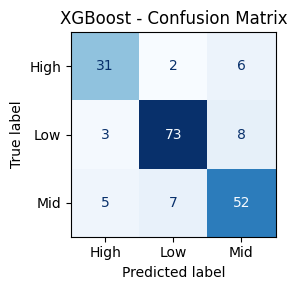

In [15]:
y_pred_encoded = tuning_results[best_model_name]['Best Model'].predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(3,3))  
disp.plot(ax=ax,cmap="Blues", colorbar=False)
plt.title(f"{best_model_name} - Confusion Matrix")
plt.tight_layout()
plt.show()

## Working with Few Features

### Loading & Preprocessing Dataset

In [16]:
small_dim_dataset = pd.read_csv('../data/few_features_data.csv')
small_dim_dataset.sample(10)

,Age,SystolicBP,BloodSugar,RiskLevel
601,33,115,7.0,Mid
231,42,120,7.7,Low
278,21,90,6.9,Mid
353,32,120,6.8,Mid
21,49,120,7.2,Low
704,32,120,6.0,Mid
699,31,120,6.1,Mid
768,60,120,7.5,Low
777,23,120,7.5,Low
210,22,120,7.0,Low


In [17]:
X = small_dim_dataset.drop(columns=['RiskLevel'])
y = small_dim_dataset['RiskLevel']

In [18]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

### Models

In [20]:
models_small = {
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, verbose=0, random_state=42)
}

In [21]:
results_small = {}
for name, model in models_small.items():
    print(f"========== {name} ==========\n")
    model.fit(X_train, le.transform(y_train))
    y_pred_encoded = model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    results_small[name] = accuracy
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("========== Model Summaries ==========\n")
for name, acc in results_small.items():
    print(f"{name}: {acc:.4f}")

========== Softmax Regression ==========

Test Accuracy: 0.5776
Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.22      0.32        18
         Low       0.59      0.74      0.66        81
         Mid       0.55      0.47      0.50        62

    accuracy                           0.58       161
   macro avg       0.57      0.48      0.49       161
weighted avg       0.57      0.58      0.56       161

========== KNN ==========

Test Accuracy: 0.5901
Classification Report:
              precision    recall  f1-score   support

        High       0.47      0.44      0.46        18
         Low       0.65      0.68      0.66        81
         Mid       0.54      0.52      0.53        62

    accuracy                           0.59       161
   macro avg       0.55      0.55      0.55       161
weighted avg       0.59      0.59      0.59       161

========== Naive Bayes ==========

Test Accuracy: 0.5963
Classification Report:

Test Accuracy: 0.7888
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.61      0.71        18
         Low       0.80      0.89      0.84        81
         Mid       0.76      0.71      0.73        62

    accuracy                           0.79       161
   macro avg       0.80      0.74      0.76       161
weighted avg       0.79      0.79      0.79       161

========== SVM ==========

Test Accuracy: 0.6211
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.39      0.50        18
         Low       0.62      0.81      0.71        81
         Mid       0.60      0.44      0.50        62

    accuracy                           0.62       161
   macro avg       0.64      0.55      0.57       161
weighted avg       0.62      0.62      0.61       161

========== XGBoost ==========

Test Accuracy: 0.8012
Classification Report:
              precision    recall  f1-score  

#### Hyperparameter Tuning

In [22]:
models_small = {
        "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
    }
params_small = {
    "Softmax Regression": {
        'C': [0.01, 0.05, 0.1, 0.5, 1, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'bootstrap': [True, False]
    },
    "AdaBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 0.5, 1, 5, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [0, 3, 5, 7, 10],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "CatBoost": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.005, 0.01, 0.05, 0.1],
        'max_depth': [2, 4, 6, 8, 10]
    }
}

In [27]:
tuning_results_small = {}
for model_name, model_params in params_small.items():
    print(f"\n======================================== {model_name} ========================================")
    model = models[model_name]
    grid = GridSearchCV(
        estimator = model,
        param_grid = model_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, le.transform(y_train))
    best_model = grid.best_estimator_
    y_pred_encoded = best_model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy of Best Model:", accuracy)
    tuning_results_small[model_name] = {
        'Best Params':grid.best_params_, 
        'Best Test Accuracy': accuracy,
        'Best Model': best_model
    }


======================================== Softmax Regression ========================================
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.01}
Best CV Score: 0.5357679263565892
Test Accuracy of Best Model: 0.5217391304347826

======================================== KNN ========================================
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best CV Score: 0.7849806201550388
Test Accuracy of Best Model: 0.782608695652174

======================================== Naive Bayes ========================================
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'var_smoothing': 1e-09}
Best CV Score: 0.5203488372093024
Test Accuracy of Best Model: 0.5962732919254659

======================================== Decision Tree ========================================
Fitting 5 folds for each of 120 candidates, totall

In [28]:
print("============================== Hyperparameter Tuning Summaries ==============================")
for name, tuning in tuning_results_small.items():
    print(f"\n=========={name}==========")
    for key, val in tuning.items():
        if key!='Best Model':
            print(f"{key}: {val}")


============================== Hyperparameter Tuning Summaries ==============================

==========Softmax Regression==========
Best Params: {'C': 0.01}
Best Test Accuracy: 0.5217391304347826

==========KNN==========
Best Params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Test Accuracy: 0.782608695652174

==========Naive Bayes==========
Best Params: {'var_smoothing': 1e-09}
Best Test Accuracy: 0.5962732919254659

==========Decision Tree==========
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Test Accuracy: 0.7515527950310559

==========Random Forest==========
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Test Accuracy: 0.8012422360248447

==========AdaBoost==========
Best Params: {'learning_rate': 0.1, 'n_estimators': 500}
Best Test Accuracy: 0.7950310559006211

==========Gradient Boosting==========
Best Params: 

In [29]:
highest_acc2 = float('-inf')
best_model_name2 = None
for name, tuning in tuning_results_small.items():
    if tuning['Best Test Accuracy'] > highest_acc2:
        highest_acc2 = tuning['Best Test Accuracy']
        best_model_name2 = name
print(f"Best model for dataset with fewer features is {best_model_name2} with a test accuracy of {(highest_acc2*100):.1f}%")

Best model for dataset with fewer features is Random Forest with a test accuracy of 80.1%


Test Accuracy: 0.8012

Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.78      0.82        18
         Low       0.86      0.80      0.83        81
         Mid       0.72      0.81      0.76        62

    accuracy                           0.80       161
   macro avg       0.82      0.80      0.80       161
weighted avg       0.81      0.80      0.80       161



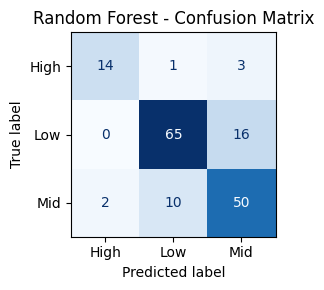

In [30]:
y_pred_encoded = tuning_results_small[best_model_name2]["Best Model"].predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(3,3))  
disp.plot(ax=ax,cmap="Blues", colorbar=False)
plt.title(f"{best_model_name2} - Confusion Matrix")
plt.tight_layout()
plt.show()

* It is clear that, despite the correlation, the larger feature space allows for better classification. 